# Derivadas

In [1]:
from pylab import *

Derivada hacia adelante:
$$
f'_i = \frac{f_{i+1}-f_{i}}{x_{i+1}-x_{i}}
$$

**Solo que no tenemos el último punto. Entonces tenemos que programar este hacia atrás.**

In [4]:
def deriv_h2(x,f):
    #Esto funciona si la malla es uniforme, pensando que todas las h son iguales. 
    f_prima = zeros_like(f) #Damos la misma cantidad de puntos que la función f
    h = x[1] - x[0] #Esta es la h que calcula todo el tiempo.
    for i in range(len(f)-1): #Restamos uno para dejar el último punto fuera
        f_prima[i] = (f[i+1]-f[i])
    f_prima[-1] = (f[-1]-f[-2]) #La división entre h mejor la hacemos al final
    return f_prima/h

In [24]:
x = linspace(0, 3*pi, 50) #Aumentar lo puntos disminuye la distancia de las h y aumenta la precisión.
y = x*sin(x)
# derivada analítica
dy = sin(x)+x*cos(x)
dy_h2 = deriv_h2(x,y)

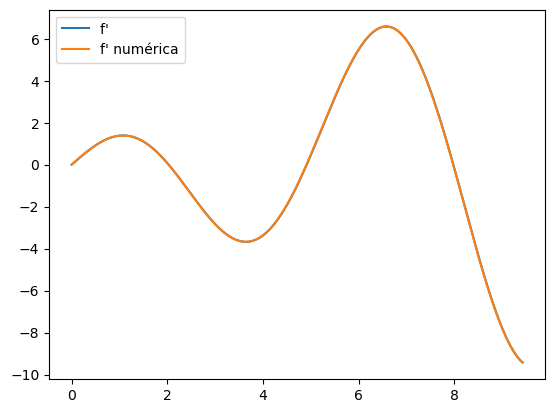

In [14]:
plot(x, dy, label = "f' ")
plot(x, dy_h2, label = "f' numérica")
legend()
show()

Lo mejor es evaluar el error de la diferencia.

0.009434212172942321


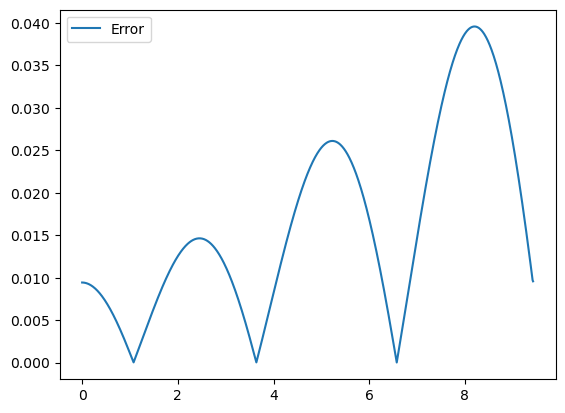

In [15]:
figure(dpi = 100)
plot(x, abs(dy-dy_h2), label = "Error")
print(x[1]-x[0])
legend()
show()

Ahora programaremos la derivada h3

Derivada centrada
$$
f'_i = \frac{f_{i+1}-f_{i-1}}{x_{i+1}-x_{i-1}}
$$

**Solo que no tenemos el último punto. Entonces tenemos que programar este hacia atrás.**

In [21]:
def deriv_h3_mix(x,f):
    f_prima = zeros_like(f)
    dosh, h = x[2]-x[0], x[1] - x[0]
    for i in range(1, len(f) - 1):   #Solo consideramos los puntos interiores
        f_prima[i] = (f[i+1]-f[i-1])/dosh
    f_prima[0] = (f[1]-f[0])/h
    f_prima[-1] = (f[-1]-f[-2])/h
    return f_prima

In [27]:
dy_h3m = deriv_h3_mix(x,y)

Graficamos ambas gráficas

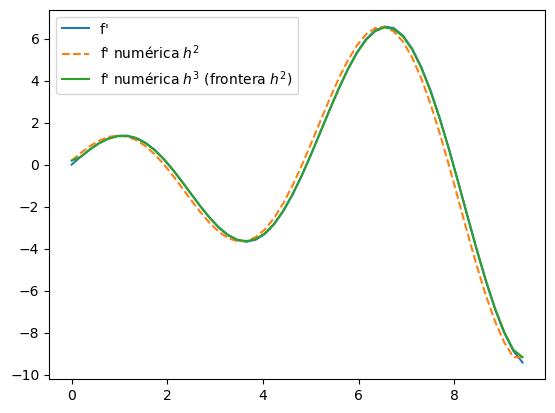

In [26]:
plot(x, dy, label = "f' ")
plot(x, dy_h2, '--', label = "f' numérica $h^2$")
plot(x, dy_h3m, label = "f' numérica $h^3$ (frontera $h^2$)")
legend()
show()

0.19234240736264038


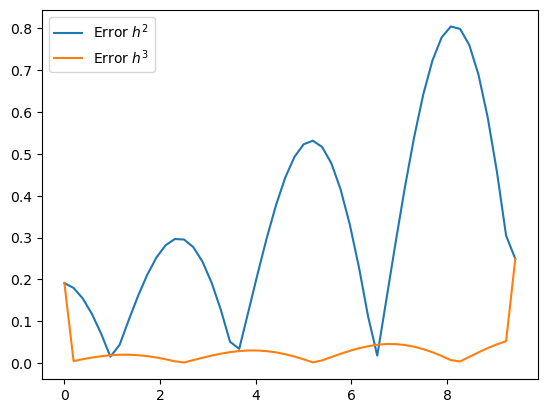

In [30]:
figure(dpi = 100)
plot(x, abs(dy-dy_h2), label = "Error $h^2$")
plot(x, abs(dy-dy_h3m), label = "Error $h^3$")
print(x[1]-x[0])
legend()
show()

¿Cómo solucionamos el problema con la frontera de h3? Aquí la mejor del código con las derivadas hacia adelante y hacia atrás

In [37]:
def deriv_h3(x,f):
    f_prima = zeros_like(f)
    dosh, h = x[2]-x[0], x[1] - x[0]
    for i in range(1, len(f) - 1):   #Solo consideramos los puntos interiores
        f_prima[i] = (f[i+1]-f[i-1])/dosh
    f_prima[0] = (-0.5*f[2]+ 2*f[1] - 1.5*f[0])/h
    f_prima[-1] = -(-0.5*f[-3]+2*f[-2]- 1.5*f[-1])/h
    return f_prima

In [39]:
dy_h3 = deriv_h3(x,y)

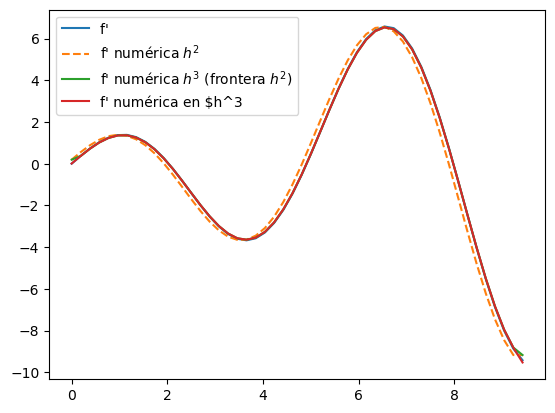

In [40]:
plot(x, dy, label = "f' ")
plot(x, dy_h2, '--', label = "f' numérica $h^2$")
plot(x, dy_h3m, label = "f' numérica $h^3$ (frontera $h^2$)")
plot(x, dy_h3, label = "f' numérica en $h^3")
legend()
show()

0.19234240736264038


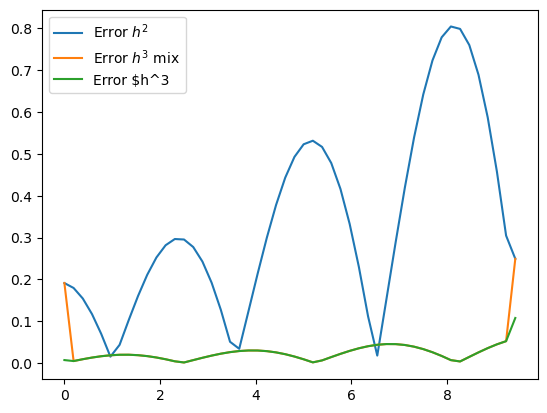

In [41]:
figure(dpi = 100)
plot(x, abs(dy-dy_h2), label = "Error $h^2$")
plot(x, abs(dy-dy_h3m), label = "Error $h^3$ mix")
plot(x, abs(dy-dy_h3), label = "Error $h^3")
print(x[1]-x[0])
legend()
show()